In [1]:
# import packages

import scipy.io as sio  # for loading matlab data
import pandas as pd

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = sio.loadmat('AMZN_20141103.mat')

In [12]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

# Midprice, Microprice and Spread

In [13]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [14]:
midprice_df = pd.DataFrame(midprice)

In [15]:
midprice_df.describe()

,0
count,234000.000000
mean,306.234948
std,0.971306
min,303.265000
25%,305.525000
50%,306.430000
75%,306.980000
max,307.985000


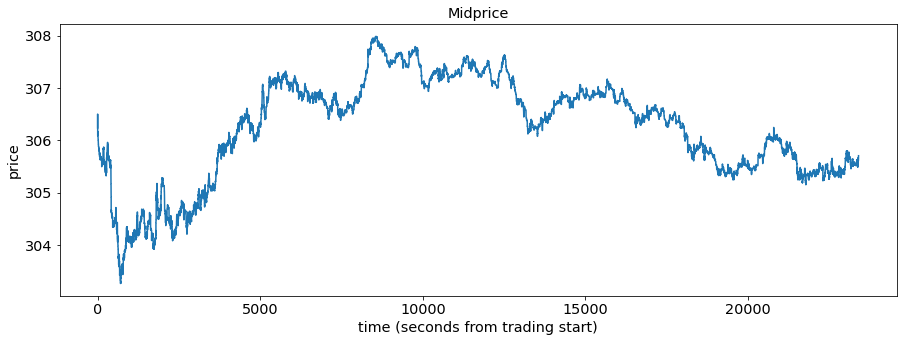

In [16]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [17]:
microprice_df = pd.DataFrame(microprice)

In [18]:
microprice_df.describe()

,0
count,234000.000000
mean,306.230662
std,0.972256
min,303.251538
25%,305.521239
50%,306.424921
75%,306.970000
max,307.987500


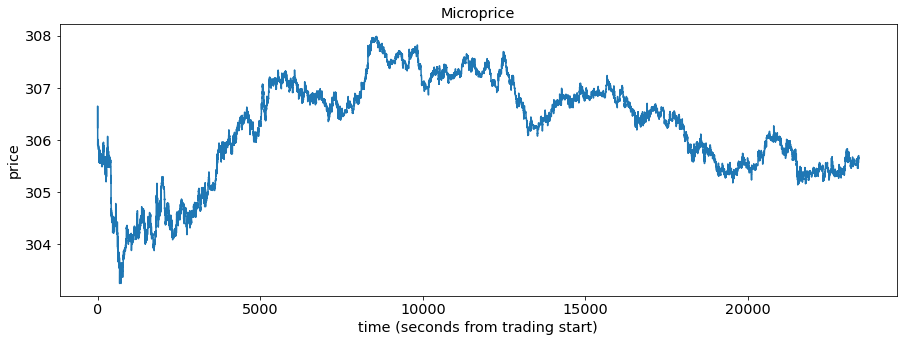

In [19]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

Plot the difference between micro and mid prices

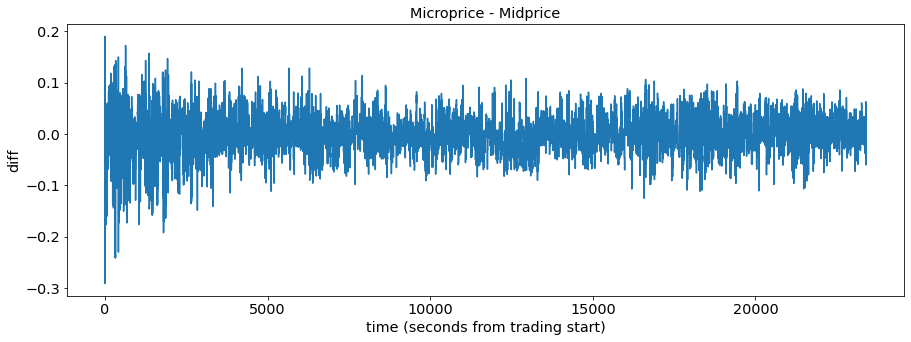

In [20]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

Note that the difference is typically in the range [-0.01, 0.01] while at the beginning of the day it is three times as large

In [21]:
spread_df = pd.DataFrame(spread)

In [22]:
spread_df.describe()

,0
count,234000.000000
mean,0.123988
std,0.055254
min,0.010000
25%,0.090000
50%,0.120000
75%,0.150000
max,0.600000


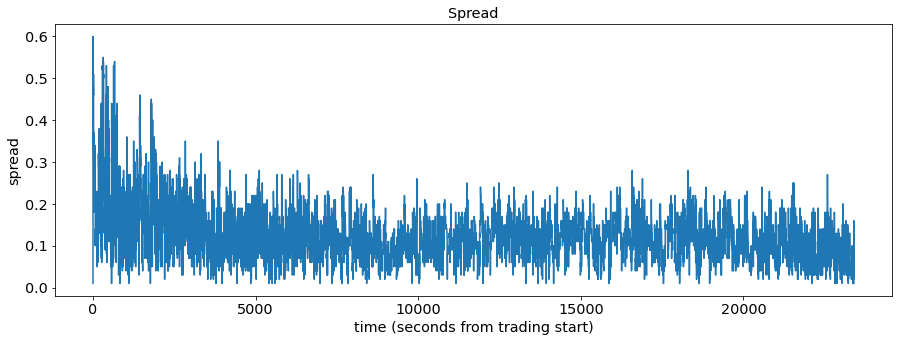

In [23]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

This plot shows that the spread is about 0.13 in the morning, but quickly drops to 0.01 but sometimes spikes to 0.02 (mostly in the morning).

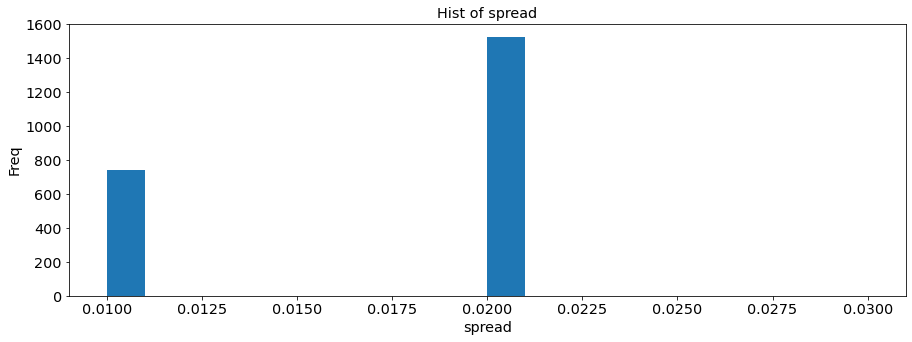

In [24]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

# Volume Imbalance

In [25]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

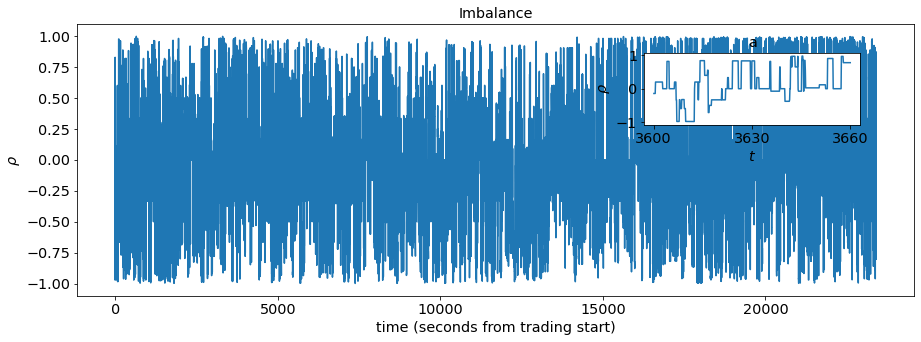

In [26]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

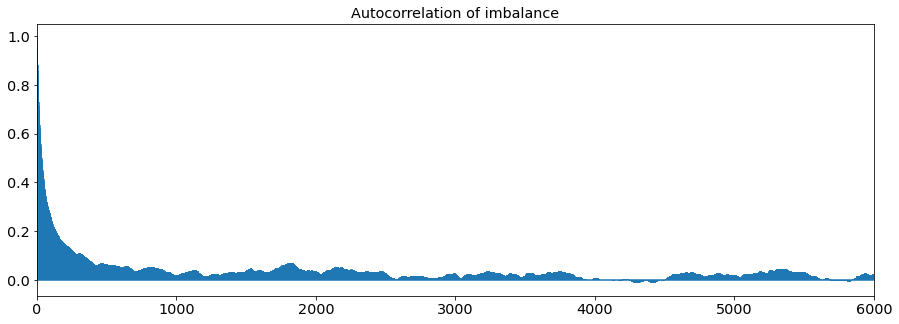

In [27]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

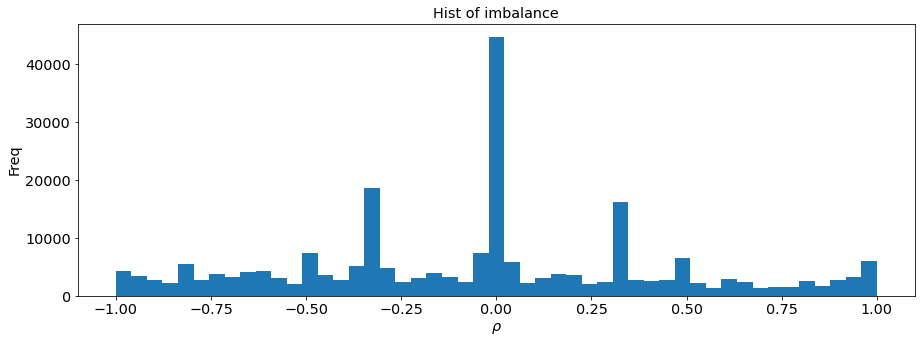

In [28]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

Volume Imbalance at times of Market Orders

In [29]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

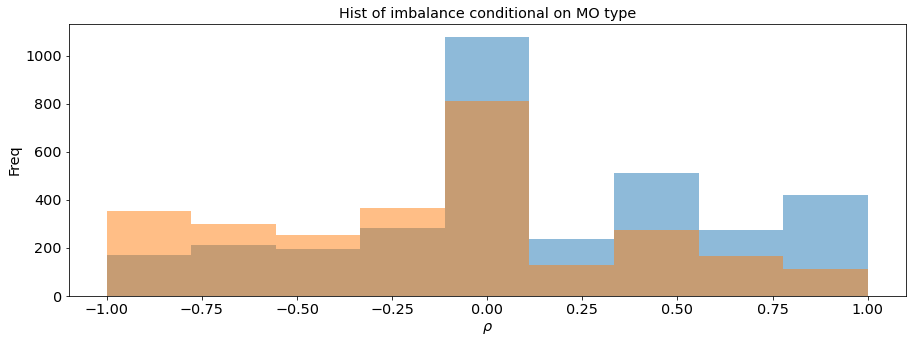

In [30]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

# Liquidation_Permanent_Price_Impact

Now we show the implementation of the optimal speed to trade at and inventory along the optimal strategy in the following code.

In [31]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


In [32]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.003
b = 0.002

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

Now we use show the change of the investor's inventory along the optimal path for various levels of the running penalty phi as alpha changes.

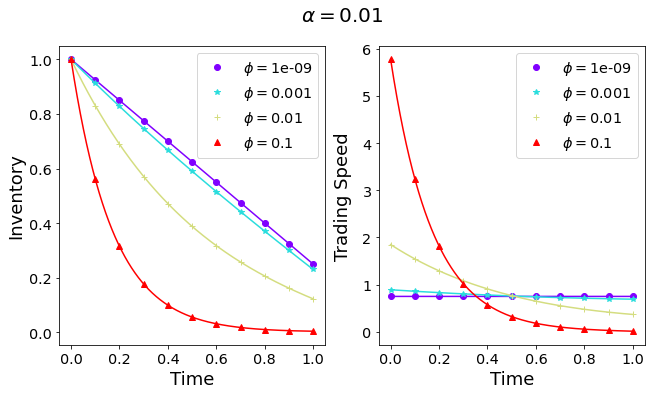

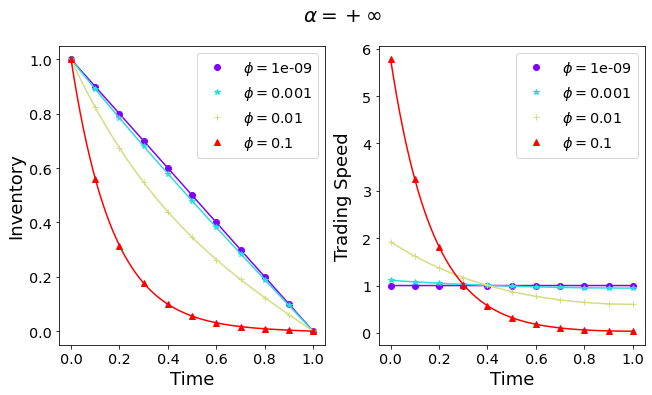

In [33]:
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")